<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Santiago Cataño Besson, .

**Fecha:** 13 de Marzo del 2023.

**Expediente** : 727527,  .
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Santiagocb17/ProyectoConjunto_S.Catano_JP.Jimenez

# Tarea 5: Clase 10

# <font color ='red'> **Tarea 5**  
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

## Parámetros de entrega
Voy a habilitar un link en Canvas donde deben de subir su cuaderno de python con la sulución de los problemas planteados en parejas. La podrán entregar a mas tardar el martes 6 de octubre a las 6pm. Como será en parejas, deben de crear un proyecto conjunto en github y realizar los ejercicios de manera conjunta, de manera similar a como realizaron los ejercicios en la tarea 1. **Deben de poner en la solución de la tarea el enlace de github de el administrador del repositorio**, del cuál me basaré para poner la calificación.

## Soluciones estudiante 1: Santiago

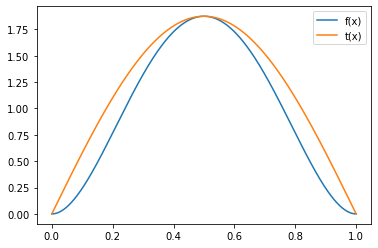

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Definir la función de densidad f(x)
def f(x):
    return 30 * (x**2 - 2*x**3 + x**4)

# Calcular el valor máximo de la función de densidad f(x)
res = minimize_scalar(lambda x: -f(x), bounds=(0, 1), method='bounded')
a = f(res.x)

# Definir la función t(x)
def t(x):
    return a * np.sin(np.pi * x)

# Generar una muestra de 1000 valores aleatorios utilizando la distribución inversa transformada
u = np.random.uniform(0, 1, size=1000)
x = np.power(u, 1/3)

# Calcular la evaluación de la función t(x) en la muestra de valores aleatorios generados
y = t(x)

# Graficar ambas funciones en la misma gráfica
x_vals = np.linspace(0, 1, 1000)
f_vals = f(x_vals)
t_vals = t(x_vals)

plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, t_vals, label='t(x)')
plt.legend()
plt.show()


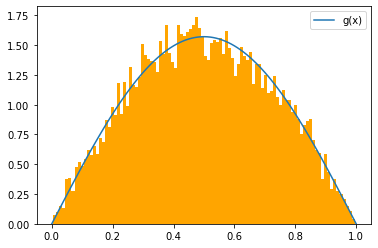

In [45]:
def Inversa(N):
    return (np.arccos(-2*np.random.random(N) + 1))/np.pi
g = lambda x: (np.pi*np.sin(np.pi*x))/2

N = 10000

x_i = Inversa(N)

plt.hist(x_i,100,density=True, color="orange")
plt.plot(x, g(x), label = 'g(x)')
plt.legend()

$$g(x) = \frac{t(x)}{c} = \frac{a\sin(\pi x)}{\int_{-\infty}^{\infty}a\sin(\pi x)dx}=$$


$$\frac{a\sin(\pi x)}{\int_{0}^{1}a\sin(\pi x)dx} = $$

$$\frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{\pi \sin(\pi x)}{2} $$


$$g(x) = \frac{\pi \sin(\pi x)}{2} $$
En este caso, se desea generar variables aleatorias que sigan la distribución de probabilidad $g(x)$, que se define como:

$$g(x) = \frac{\pi \sin(\pi x)}{2}$$

Para aplicar la técnica de la inversa transformada, primero es necesario encontrar la función de distribución acumulada $G(x)$. Esto se hace integrando la función de densidad $g(x)$:

$$G(x) = \int_{-\infty}^x g(t) dt$$

Para esta función de densidad, la integral puede evaluarse de la siguiente manera:

$$G(x) = \int_{0}^x \frac{\pi \sin(\pi t)}{2} dt = \frac{1}{2}\left[-\cos(\pi t)\right]_0^x = \frac{1}{2}(-\cos(\pi x) + 1)$$

Para generar variables aleatorias que sigan la distribución $g(x)$, se sigue el siguiente algoritmo utilizando la función de distribución acumulada obtenida:

Generar una muestra de $N$ valores aleatorios uniformes $U$ en el intervalo $(0,1)$.
Aplicar la función inversa $G^{-1}(U)$ a cada valor generado en el paso anterior.
Los valores obtenidos en el paso anterior siguen la distribución $g(x)$.
La función inversa de $G(x)$ se obtiene despejando $x$ de la ecuación $G(x) = U$:

$$\frac{1}{2}(-\cos(\pi x) + 1) = U$$

$$-\cos(\pi x) + 1 = 2U$$

$$\cos(\pi x) = -2U + 1$$

$$x = \frac{\arccos(-2U + 1)}{\pi}$$

Por lo tanto, se pueden generar $N$ valores aleatorios que sigan la distribución $g(x)$ aplicando esta función inversa a una muestra de $N$ valores aleatorios uniformes $U$ en el intervalo $(0,1)$.

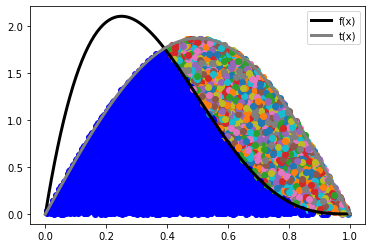

In [49]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f', x):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    plt.plot(x, f(x), label = 'f(x)', linewidth = 3, color = 'black')
    plt.plot(x, t(x), label = 't(x)', linewidth = 3, color = 'gray')

    plt.legend()           
    plt.show()


R2 = np.random.rand(N)
R1 = x_i

Acep_rechazo(R2,R1,f,t, x)

plt.show()

In [50]:
t_1 = lambda x: a * np.ones(len(x))
R1_1 = np.random.rand(N)

def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return len(x)/len(R1)


print(f'El porcentaje de puntos de aceptación para la t(x) senoidal es de: {Acep_rechazo3(R2,R1,f,t) *100}% y el porcentaje de puntos de aceptación para la t(x) constante es: {Acep_rechazo3(R2,R1_1,f,t_1)*100}%')

El porcentaje de puntos de aceptación para la t(x) senoidal es de: 63.36000000000001% y el porcentaje de puntos de aceptación para la t(x) constante es: 51.67%


### Como la senoidal nos da un porcentaje mayor, podemos concluir que acierta más y que es mejor opción.

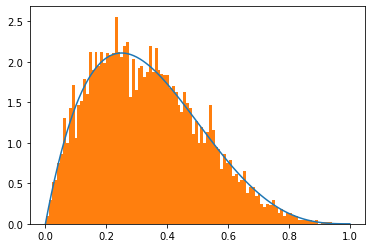

In [51]:
from scipy import optimize
x = np.arange(0,1.01,0.01)
f = lambda x: 20*x*(1-x)**3

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t_2 = lambda x: max_f*np.ones(len(x))

R2 = np.random.rand(N)
R1 = np.random.rand(N)


def Acep_rechazo4(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f', x):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x_f = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.plot(x, f(x), label = 'f(x)')
    plt.hist(x_f, density = True, bins = 100)
Acep_rechazo4(R2,R1,f,t_2, x)

## Soluciones estuiante 2: Jose Pablo